# Financial Data Analysis

**Dataset Info:**
Sample Data Set containing Financial data of a company

In [254]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from datetime import datetime

**Load the data file **

In [255]:
df = pd.read_excel('DataBase.xlsx',sheet_name=None)

#Excel: pd.read_excel
#Text: pd.read_csv sep: ' ' ',' ';' ':'

In [256]:
type(df)

dict

In [257]:
df

{'Chart Of Accounts':      Account ID       Category  Sub Category  \
 0             3  CASH OUT FLOW  TRANSACTIONS   
 1             4   CASH IN FLOW  TRANSACTIONS   
 2             6  CASH OUT FLOW  TRANSACTIONS   
 3             5   CASH IN FLOW  TRANSACTIONS   
 4             2  CASH OUT FLOW  TRANSACTIONS   
 ..          ...            ...           ...   
 132        7006  CASH OUT FLOW   TAXS / FEES   
 133        7010  CASH OUT FLOW   TAXS / FEES   
 134        7011  CASH OUT FLOW   TAXS / FEES   
 135        7012  CASH OUT FLOW   TAXS / FEES   
 136        7013  CASH OUT FLOW   TAXS / FEES   
 
                                          Groups   Cash Flow Type      Type  
 0                          INVESTMENTS (INVEST)  NON-OPERATIONAL   REVENUE  
 1                          INVESTMENTS (REDEEM)  NON-OPERATIONAL   REVENUE  
 2                              MUTUAL - EXPENSE  NON-OPERATIONAL   REVENUE  
 3                              MUTUAL - REVENUE  NON-OPERATIONAL   REVENUE  

In [258]:
#Extracting payments data in Payments_df
Payments_df=df['Payments']

In [259]:
#Extracting income dats in Income_df
Income_df=df['Income']

In [260]:
#Extracting income dats in Income_df
Chart_of_accounts_df=df['Chart Of Accounts']

In [261]:
Chart_of_accounts_df.rename(columns={"Account ID": "Chart Account ID"}, inplace=True)

In [262]:
All_Payments_df = pd.merge(Chart_of_accounts_df, Payments_df, on='Chart Account ID', how='right')

In [263]:
All_Payments_df.head()

,Chart Account ID,Category,Sub Category,Groups,Cash Flow Type,Type,Issue Date,Due Date,Settlement Date,Provider,UF,Amount Paid
0,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-08-25,2017-08-25,Provider 1,SP,810.52
1,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-08-11,2017-08-11,Provider 1,SP,969.39
2,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-28,2017-07-28,Provider 1,SP,950.57
3,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-21,2017-07-21,Provider 1,SP,2348.31
4,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-14,2017-07-14,Provider 1,SP,836.49


In [264]:
All_Income_df = pd.merge(Chart_of_accounts_df, Income_df, on='Chart Account ID', how='right')

Look at the top 5 records of data

Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [265]:
All_Payments_df.head()

,Chart Account ID,Category,Sub Category,Groups,Cash Flow Type,Type,Issue Date,Due Date,Settlement Date,Provider,UF,Amount Paid
0,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-08-25,2017-08-25,Provider 1,SP,810.52
1,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-08-11,2017-08-11,Provider 1,SP,969.39
2,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-28,2017-07-28,Provider 1,SP,950.57
3,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-21,2017-07-21,Provider 1,SP,2348.31
4,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-14,2017-07-14,Provider 1,SP,836.49


In [266]:
#merging payments and income data
merged_df = pd.merge(All_Income_df, All_Payments_df, how='outer')

In [267]:
merged_df.columns.values

array(['Chart Account ID', 'Category', 'Sub Category', 'Groups',
       'Cash Flow Type', 'Type', 'Issue Date', 'Due Date',
       'Settlement Date', 'UF', 'Customer', 'Amount Received', 'Provider',
       'Amount Paid'], dtype=object)

In [268]:
# Checking the data types of all the columns
merged_df.dtypes

Chart Account ID             int64
Category                    object
Sub Category                object
Groups                      object
Cash Flow Type              object
Type                        object
Issue Date          datetime64[ns]
Due Date            datetime64[ns]
Settlement Date     datetime64[ns]
UF                          object
Customer                    object
Amount Received            float64
Provider                    object
Amount Paid                float64
dtype: object

In [269]:
# Check the descriptive statistics of numeric variables
merged_df.describe()

,Chart Account ID,Amount Received,Amount Paid
count,34723.000000,14671.000000,20052.000000
mean,5738.658123,4146.476006,3566.200249
std,915.950231,23639.438854,11815.116802
min,6.000000,0.000000,0.010000
25%,5003.000000,514.805000,227.232500
50%,6105.000000,949.270000,976.720000
75%,6309.000000,1899.735000,2878.625000
max,7013.000000,895806.780000,638443.670000


In [270]:
merged_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34723 entries, 0 to 34722
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Chart Account ID  34723 non-null  int64         
 1   Category          34723 non-null  object        
 2   Sub Category      34723 non-null  object        
 3   Groups            34723 non-null  object        
 4   Cash Flow Type    34723 non-null  object        
 5   Type              34723 non-null  object        
 6   Issue Date        34723 non-null  datetime64[ns]
 7   Due Date          34723 non-null  datetime64[ns]
 8   Settlement Date   34723 non-null  datetime64[ns]
 9   UF                34723 non-null  object        
 10  Customer          14671 non-null  object        
 11  Amount Received   14671 non-null  float64       
 12  Provider          20052 non-null  object        
 13  Amount Paid       20052 non-null  float64       
dtypes: datetime64[ns](3), 

In [271]:
merged_df.isnull().sum()

Chart Account ID        0
Category                0
Sub Category            0
Groups                  0
Cash Flow Type          0
Type                    0
Issue Date              0
Due Date                0
Settlement Date         0
UF                      0
Customer            20052
Amount Received     20052
Provider            14671
Amount Paid         14671
dtype: int64

In [272]:
merged_df.shape

(34723, 14)

In [273]:
merged_df['Amount Paid'].sum()

71509447.39999999

In [274]:
merged_df['Amount Received'].sum()

60832949.489999995

Company's out flow is more than company's inflow.

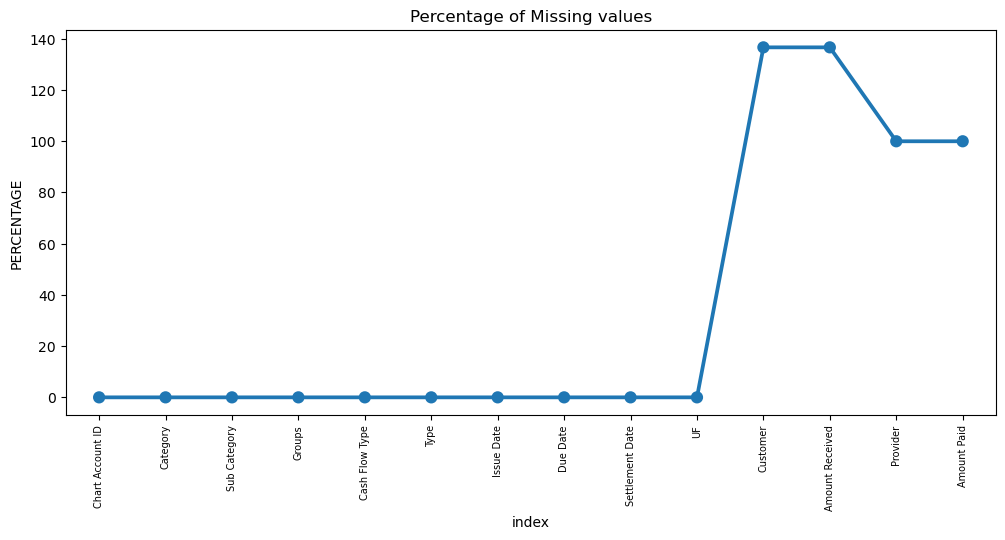

In [275]:
missing = pd.DataFrame((merged_df.isnull().sum()) * 100 / All_Income_df.shape[0]).reset_index()
plt.figure(figsize=(12, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

There are some missing values in data

Now, there are no missing values in the data.

## Data Cleaning


In [276]:
new_df = merged_df.copy()

In [277]:
# missing value treatment
new_df.fillna(0, inplace=True)

In [278]:
new_df.isnull().sum()

Chart Account ID    0
Category            0
Sub Category        0
Groups              0
Cash Flow Type      0
Type                0
Issue Date          0
Due Date            0
Settlement Date     0
UF                  0
Customer            0
Amount Received     0
Provider            0
Amount Paid         0
dtype: int64

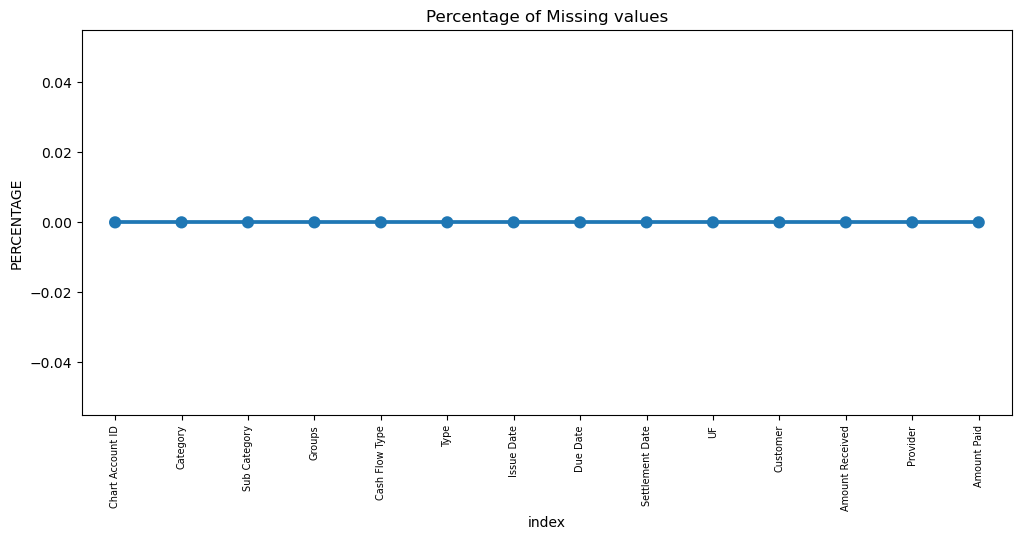

In [279]:
missing = pd.DataFrame((new_df.isnull().sum()) * 100 / All_Income_df.shape[0]).reset_index()
plt.figure(figsize=(12, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [280]:
new_df.describe()

,Chart Account ID,Amount Received,Amount Paid
count,34723.000000,34723.000000,34723.000000
mean,5738.658123,1751.949702,2059.425954
std,915.950231,15501.523571,9149.677526
min,6.000000,0.000000,0.000000
25%,5003.000000,0.000000,0.000000
50%,6105.000000,0.000000,65.200000
75%,6309.000000,777.930000,1268.880000
max,7013.000000,895806.780000,638443.670000


In [281]:
#  Remove columns not required for processing
columns_to_drop = ['Due Date','Issue Date']
new_df = new_df.drop(columns_to_drop, axis=1)

In [282]:
new_df.to_excel('findash.xlsx', index=False)

In [283]:
new_df.head()

,Chart Account ID,Category,Sub Category,Groups,Cash Flow Type,Type,Settlement Date,UF,Customer,Amount Received,Provider,Amount Paid
0,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-31,RJ,Customer 1,787.13,0,0.0
1,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-02-02,RJ,Customer 1,655.13,0,0.0
2,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-02-07,RJ,Customer 1,354.72,0,0.0
3,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-04,SP,Customer 2,2597.01,0,0.0
4,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-02-08,SP,Customer 3,785.65,0,0.0


Univariate Analysis

In [284]:
new_df.groupby(['Type'])[['Amount Paid']].sum()

,Amount Paid
Type,
FIXED,17642631.65
REVENUE,9674874.13
VARIABLE,44191941.62


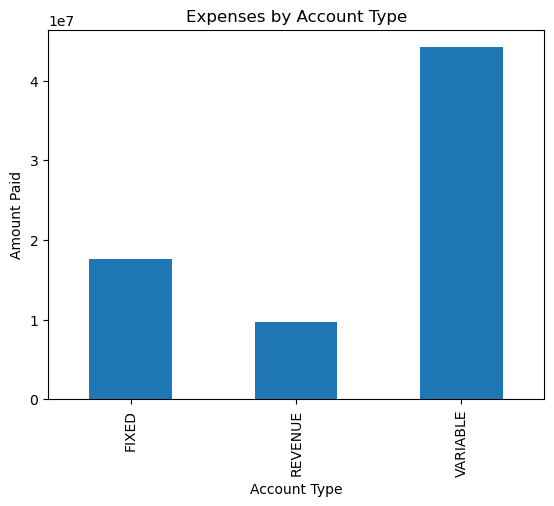

In [285]:
new_df.groupby('Type')['Amount Paid'].sum().plot(kind='bar').plot(kind='bar')
plt.xlabel('Account Type')
plt.ylabel('Amount Paid')
plt.title('Expenses by Account Type')
plt.show()


Expenses in variable accounts are the highest.

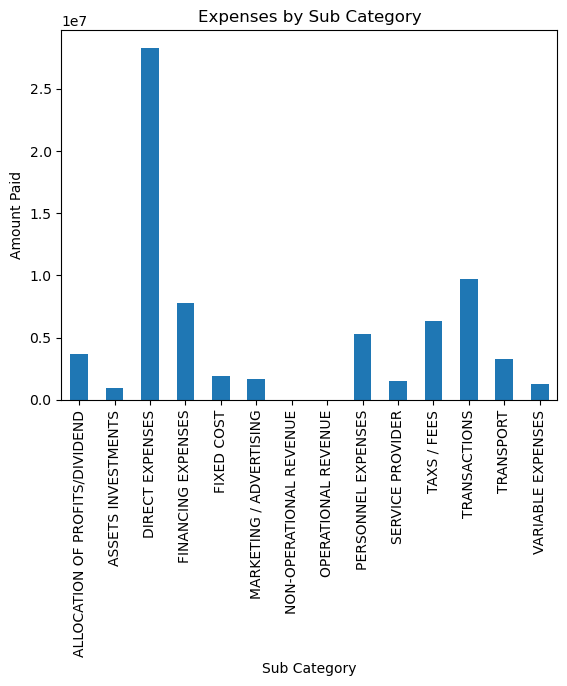

In [286]:
new_df.groupby('Sub Category')['Amount Paid'].sum().plot(kind='bar').plot(kind='bar')
plt.xlabel('Sub Category')
plt.ylabel('Amount Paid')
plt.title('Expenses by Sub Category')
plt.show()


Direct expenses are highest than other expenses.

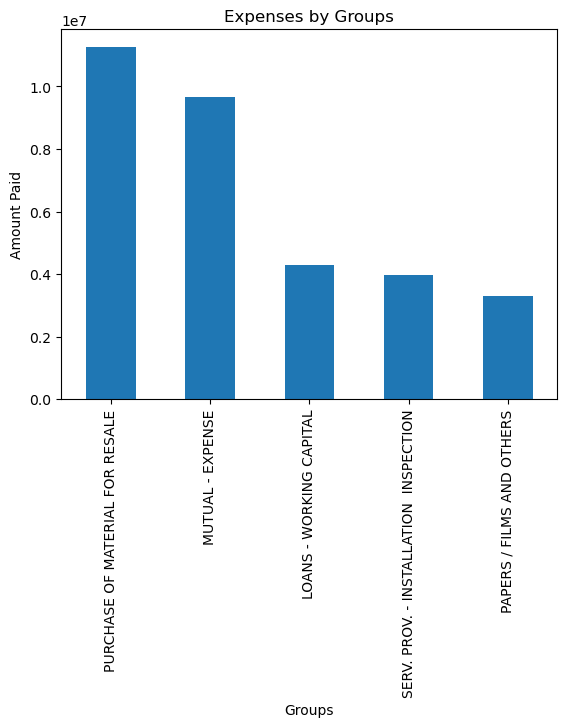

In [287]:
new_df.groupby('Groups')['Amount Paid'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel('Groups')
plt.ylabel('Amount Paid')
plt.title('Expenses by Groups')
plt.show()


Expenses incurred on Purchase of Material for resale are highest

In [288]:
new_df.groupby(['Cash Flow Type'])[['Amount Paid']].sum()

,Amount Paid
Cash Flow Type,
NON-OPERATIONAL,16697011.11
OPERATIONAL,54812436.29


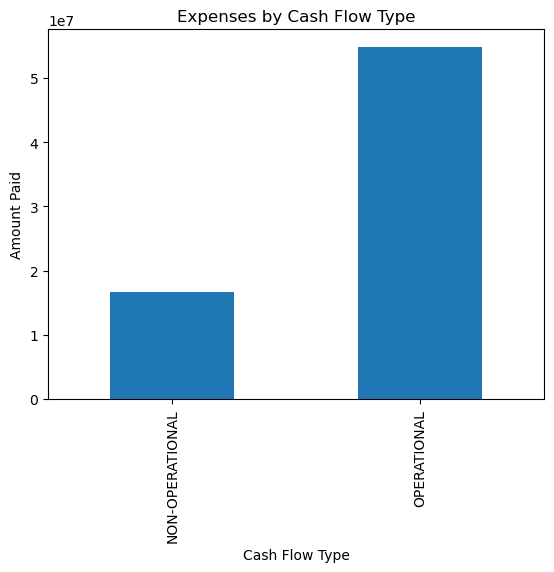

In [289]:
new_df.groupby('Cash Flow Type')['Amount Paid'].sum().plot(kind='bar').plot(kind='bar')
plt.xlabel('Cash Flow Type')
plt.ylabel('Amount Paid')
plt.title('Expenses by Cash Flow Type')
plt.show()


Operational expenses are more than non operational expenses.

In [290]:
Total_expenses = new_df['Amount Paid'].sum()

In [291]:
Total_expenses

71509447.39999999

The total expenses incurred by company are 7.15 Crores.

In [292]:
new_df.groupby(['Type'])[['Amount Received']].sum()

,Amount Received
Type,
FIXED,0.00
REVENUE,60832949.49
VARIABLE,0.00


In [293]:
Total_revenue=new_df['Amount Received'].sum()

In [294]:
Total_revenue

60832949.489999995

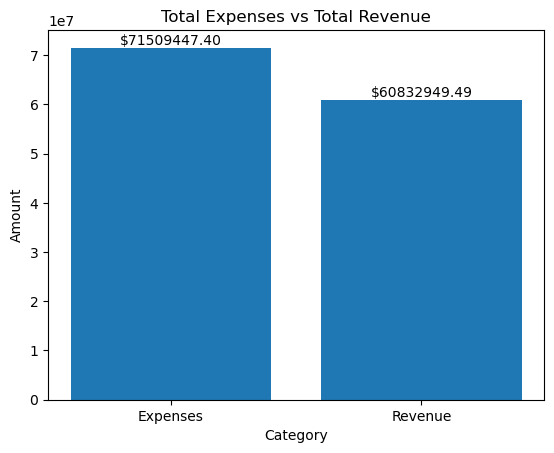

In [295]:
plt.bar(['Expenses', 'Revenue'], [Total_expenses, Total_revenue])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Total Expenses vs Total Revenue')
plt.text(0, Total_expenses, f"${Total_expenses:.2f}", ha='center', va='bottom')
plt.text(1, Total_revenue, f"${Total_revenue:.2f}", ha='center', va='bottom')

# Display the plot
plt.show()

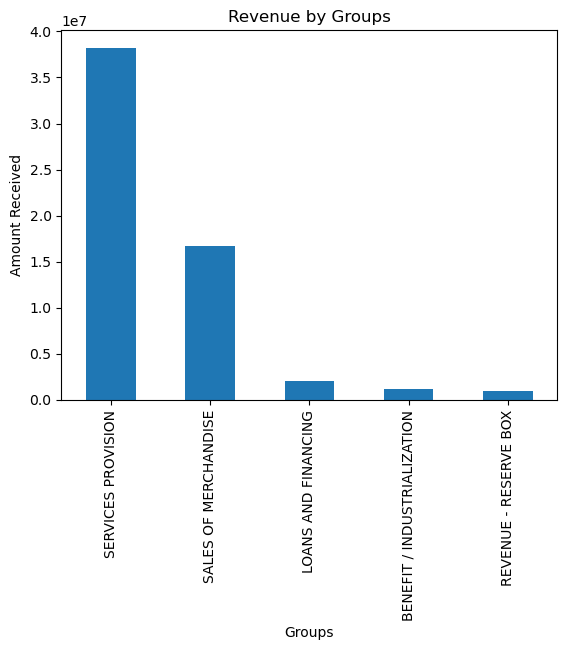

In [296]:
new_df.groupby('Groups')['Amount Received'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel('Groups')
plt.ylabel('Amount Received')
plt.title('Revenue by Groups')
plt.show()

Revenue in Services Provision group is highest.

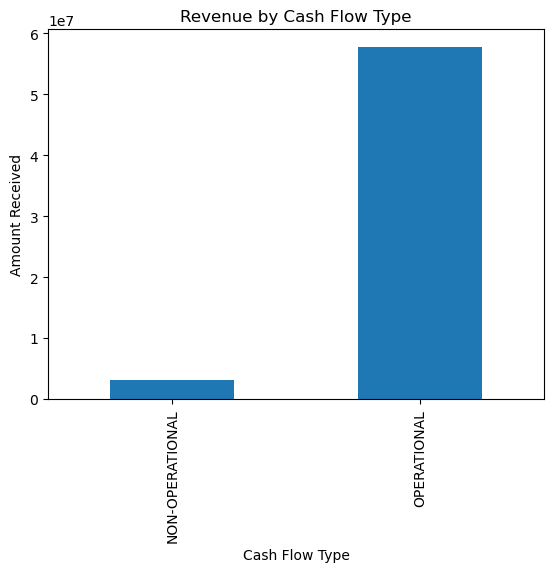

In [297]:
new_df.groupby('Cash Flow Type')['Amount Received'].sum().plot(kind='bar').plot(kind='bar')
plt.xlabel('Cash Flow Type')
plt.ylabel('Amount Received')
plt.title('Revenue by Cash Flow Type')
plt.show()

Operational revenue is more than non-operational.

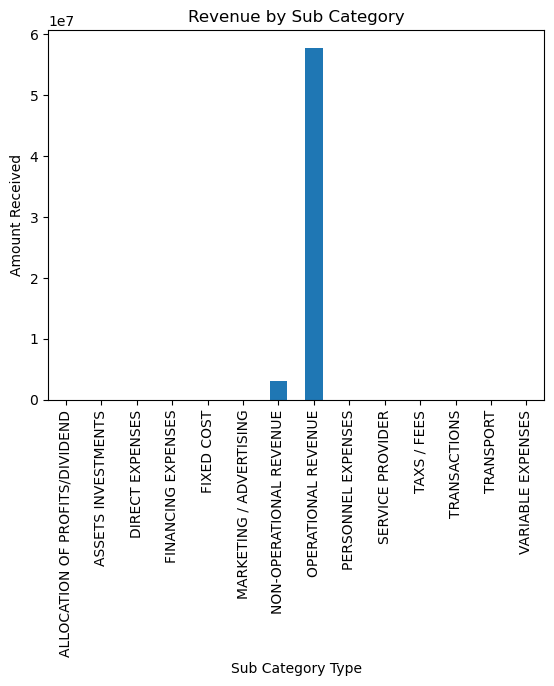

In [298]:
new_df.groupby('Sub Category')['Amount Received'].sum().plot(kind='bar').plot(kind='bar')
plt.xlabel('Sub Category Type')
plt.ylabel('Amount Received')
plt.title('Revenue by Sub Category')
plt.show()

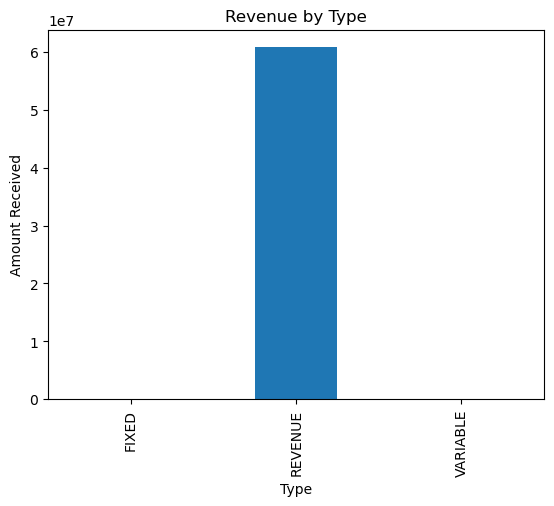

In [299]:
new_df.groupby('Type')['Amount Received'].sum().plot(kind='bar').plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Amount Received')
plt.title('Revenue by Type')
plt.show()

In [300]:
new_df.groupby('Customer')['Amount Received'].sum().sort_values(ascending=False).head(10)

Customer
Customer 9       8462117.24
Customer 26      7615036.50
Customer 2112    2395395.79
Customer 1828    1566669.13
Customer 741     1536493.78
Customer 941     1466862.96
Customer 148     1419195.32
Customer 1586    1353418.76
Customer 1580    1089695.43
Customer 202     1067349.30
Name: Amount Received, dtype: float64

<Axes: xlabel='Customer'>

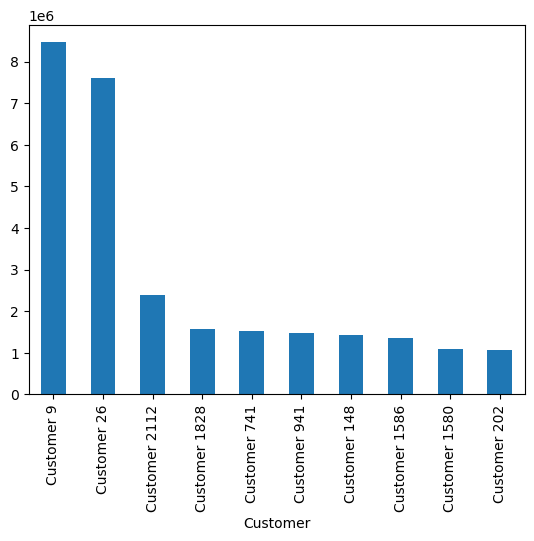

In [301]:
new_df.groupby('Customer')['Amount Received'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [302]:
new_df.groupby('Provider')['Amount Paid'].sum().sort_values(ascending=False).head(10)

Provider
Provider 667     6066446.90
Provider 1156    5959831.75
Provider 167     4415910.58
Provider 145     2854018.87
Provider 668     2507789.18
Provider 212     2151251.47
Provider 427     2135701.34
Provider 405     1917123.51
Provider 539     1840634.26
Provider 168     1727026.67
Name: Amount Paid, dtype: float64

<Axes: xlabel='Provider'>

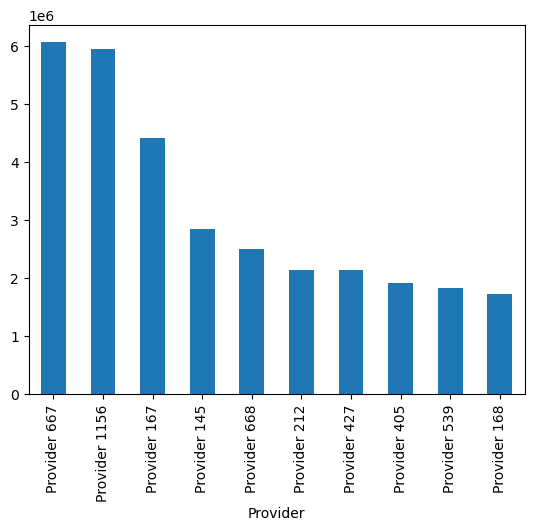

In [303]:
new_df.groupby('Provider')['Amount Paid'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [304]:
new_df.groupby('UF')['Amount Paid'].sum().sort_values(ascending=False).head(10)

UF
SP    61254750.87
RS     6819228.36
ES     1105195.87
PR      642211.18
RJ      446494.87
BA      407730.03
MG      391684.84
PE       97766.51
CE       95253.54
GO       78486.79
Name: Amount Paid, dtype: float64

Text(0, 0.5, 'Amount Paid')

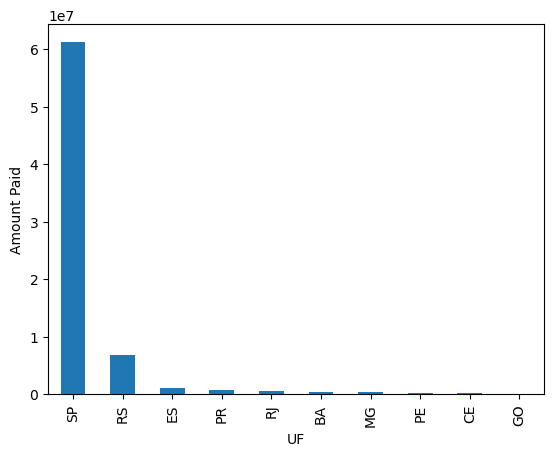

In [316]:
new_df.groupby('UF')['Amount Paid'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Amount Paid')

In [306]:
new_df.groupby('UF')['Amount Received'].sum().sort_values(ascending=False).head(10)

UF
SP    56052553.02
DF     1709562.17
RJ      974587.74
PR      612714.53
MG      347626.68
BA      165895.89
SC      156666.07
ES      130952.57
RS      121191.65
GO       96642.36
Name: Amount Received, dtype: float64

Text(0, 0.5, 'Amount Received')

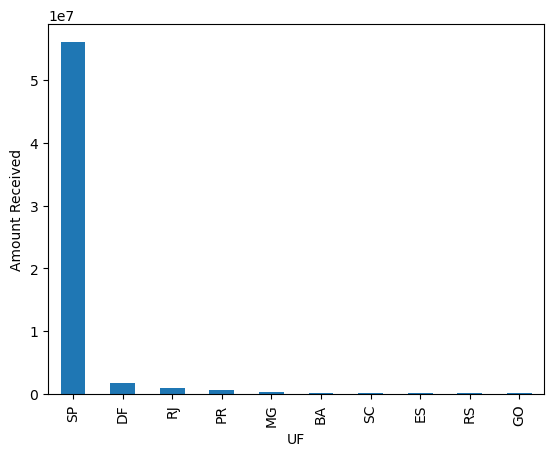

In [307]:
new_df.groupby('UF')['Amount Received'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Amount Received')

In [308]:
new_df['Amount Received'].sum()

60832949.489999995

In [309]:
new_df['month_year'] = merged_df['Settlement Date'].dt.strftime('%B-%Y')

In [310]:
new_df['month_year']

0         January-2017
1        February-2017
2        February-2017
3         January-2017
4        February-2017
             ...      
34718       April-2017
34719      August-2018
34720      August-2019
34721      August-2019
34722      August-2019
Name: month_year, Length: 34723, dtype: object

In [311]:
new_df['year'] = pd.to_datetime(new_df['month_year'], format='%B-%Y').dt.year


In [312]:
new_df.to_csv('findata.csv', index=False)

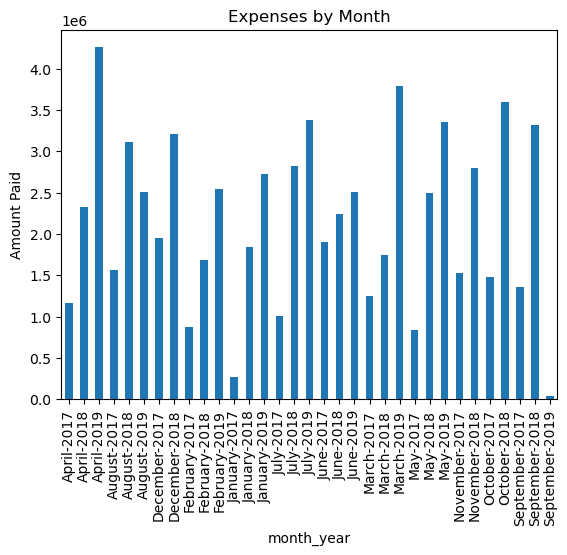

In [313]:
new_df.groupby('month_year')['Amount Paid'].sum().plot(kind='bar').plot(kind='bar')
plt.xlabel('month_year')
plt.ylabel('Amount Paid')
plt.title('Expenses by Month')
plt.show()

Expenses incurred in April 2019 are highest and least expenses were incurred in January 2017.

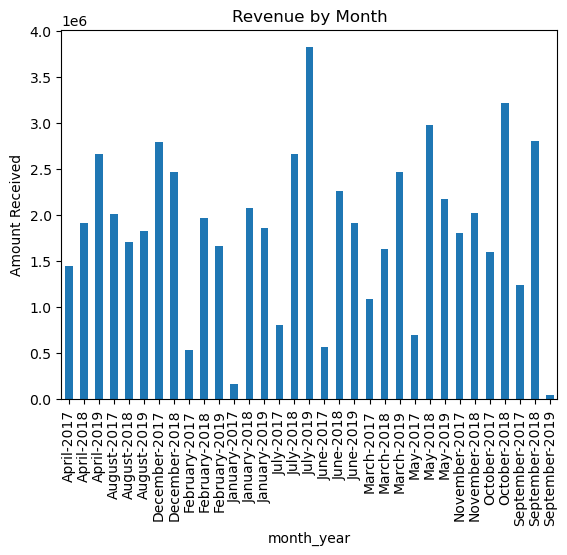

In [314]:
new_df.groupby('month_year')['Amount Received'].sum().plot(kind='bar').plot(kind='bar')
plt.xlabel('month_year')
plt.ylabel('Amount Received')
plt.title('Revenue by Month')
plt.show()

In July 2019, highest revenue was generated, and January 2017 is the least revenue generated month.

Insights from analysimg Income data are:
1. Total revenue  generated by compnay is 60832949.49 and the total expenses incurred by company are 71509447.39.
2. In July 2019, highest revenue was generated, and January 2017 is the least revenue generated month.
3. Revenue in Services Provision group is highest.
4. Operational Revenue is more than non-operational revenue and Operational expenses are more than non operational expenses.
5. Expenses incurred on Purchase of Material for resale are highest.
6. Direct expenses are highest than other expenses.
7. Expenses in variable accounts are the highest.
8. Expenses incurred in April 2019 are highest and least expenses were incurred in January 2017.

In [315]:
Total_revenue=new_df['Amount Received'].sum()

In [229]:
profit_loss= Total_revenue - Total_expenses

In [230]:
profit_loss

-10676497.909999996

In [231]:
profit_loss_by_month=new_df.groupby('month_year')['Amount Received'].sum()-new_df.groupby('month_year')['Amount Paid'].sum()

In [232]:
profit_loss_by_month

month_year
April-2017         278164.90
April-2018        -419882.75
April-2019       -1592568.17
August-2017        435847.49
August-2018      -1404720.62
August-2019       -687350.07
December-2017      836518.35
December-2018     -737382.11
February-2017     -341582.44
February-2018      278821.40
February-2019     -878011.01
January-2017      -114149.92
January-2018       233527.47
January-2019      -863982.69
July-2017         -204339.37
July-2018         -163997.84
July-2019          440204.15
June-2017        -1341313.37
June-2018           12849.17
June-2019         -588334.41
March-2017        -163884.26
March-2018        -114086.26
March-2019       -1330788.39
May-2017          -139060.47
May-2018           482407.23
May-2019         -1183977.16
November-2017      274757.46
November-2018     -774955.08
October-2017       111414.80
October-2018      -387835.24
September-2017    -121632.98
September-2018    -516134.37
September-2019       8958.65
dtype: float64

In [233]:
profit_loss_by_year=new_df.groupby('year')['Amount Received'].sum()-new_df.groupby('year')['Amount Paid'].sum()

In [234]:
profit_loss_by_year

year
2017    -489259.81
2018   -3511389.00
2019   -6675849.10
dtype: float64

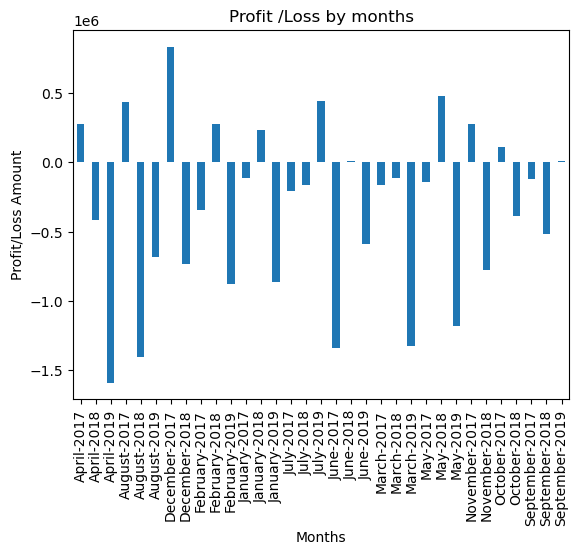

In [235]:
profit_loss_by_month.plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Profit/Loss Amount')
plt.title('Profit /Loss by months')
plt.show()

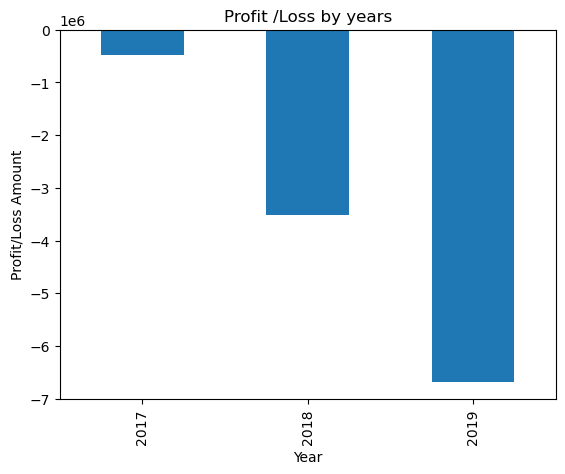

In [236]:
profit_loss_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Profit/Loss Amount')
plt.title('Profit /Loss by years')
plt.show()

The comany is in continous loss from 2017 to 2019. Highest loss is in 2019.

In [237]:
#  Remove columns not required for processing
columns_to_drop = ['Groups','Customer','Provider','UF','month_year']
new_df = new_df.drop(columns_to_drop, axis=1)

In [238]:
# For Machine Learning (Predictive Modelling), we need to perform Feature Encoding
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,Chart Account ID,Settlement Date,Amount Received,Amount Paid,year,Category_CASH IN FLOW,Category_CASH OUT FLOW,Sub Category_ALLOCATION OF PROFITS/DIVIDEND,Sub Category_ASSETS INVESTMENTS,Sub Category_DIRECT EXPENSES,...,Sub Category_SERVICE PROVIDER,Sub Category_TAXS / FEES,Sub Category_TRANSACTIONS,Sub Category_TRANSPORT,Sub Category_VARIABLE EXPENSES,Cash Flow Type_NON-OPERATIONAL,Cash Flow Type_OPERATIONAL,Type_FIXED,Type_REVENUE,Type_VARIABLE
0,5003,2017-01-31,787.13,0.0,2017,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5003,2017-02-02,655.13,0.0,2017,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,5003,2017-02-07,354.72,0.0,2017,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,5003,2017-01-04,2597.01,0.0,2017,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,5003,2017-02-08,785.65,0.0,2017,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


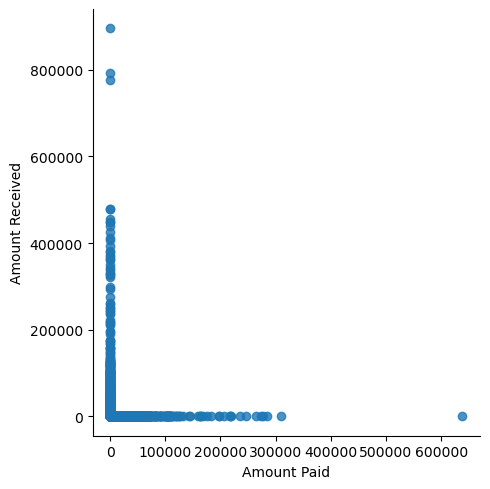

In [239]:
sns.lmplot(data=new_df_dummies, x='Amount Paid', y='Amount Received', fit_reg=False)

In [240]:
new_df_dummies['Amount Paid'].corr(new_df_dummies['Amount Received'])

-0.02543900670349728

The value of -0.02543900670349728 indicates a weak negative correlation between the variables.

C:\Users\Admin\AppData\Local\Temp\ipykernel_336\3141285240.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies['Amount Paid'],
C:\Users\Admin\AppData\Local\Temp\ipykernel_336\3141285240.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies['Amount Received'],


Text(0.5, 1.0, 'Monthly charges by churn')

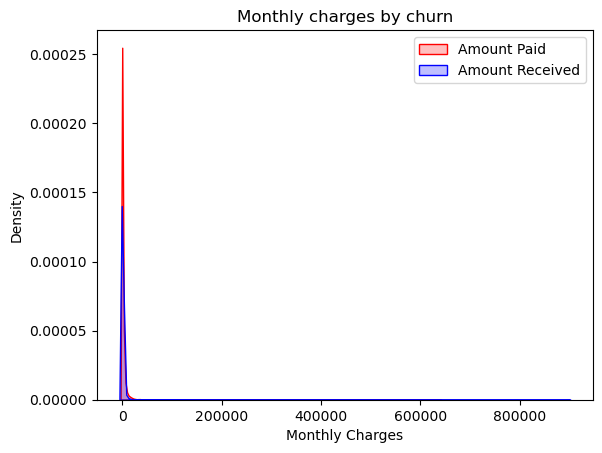

In [317]:
Mth = sns.kdeplot(new_df_dummies['Amount Paid'],
                color="Red", shade = True)
Mth = sns.kdeplot(new_df_dummies['Amount Received'],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["Amount Paid","Amount Received"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\Admin\AppData\Local\Temp\ipykernel_336\185131655.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df_dummies.corr()['Amount Paid'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

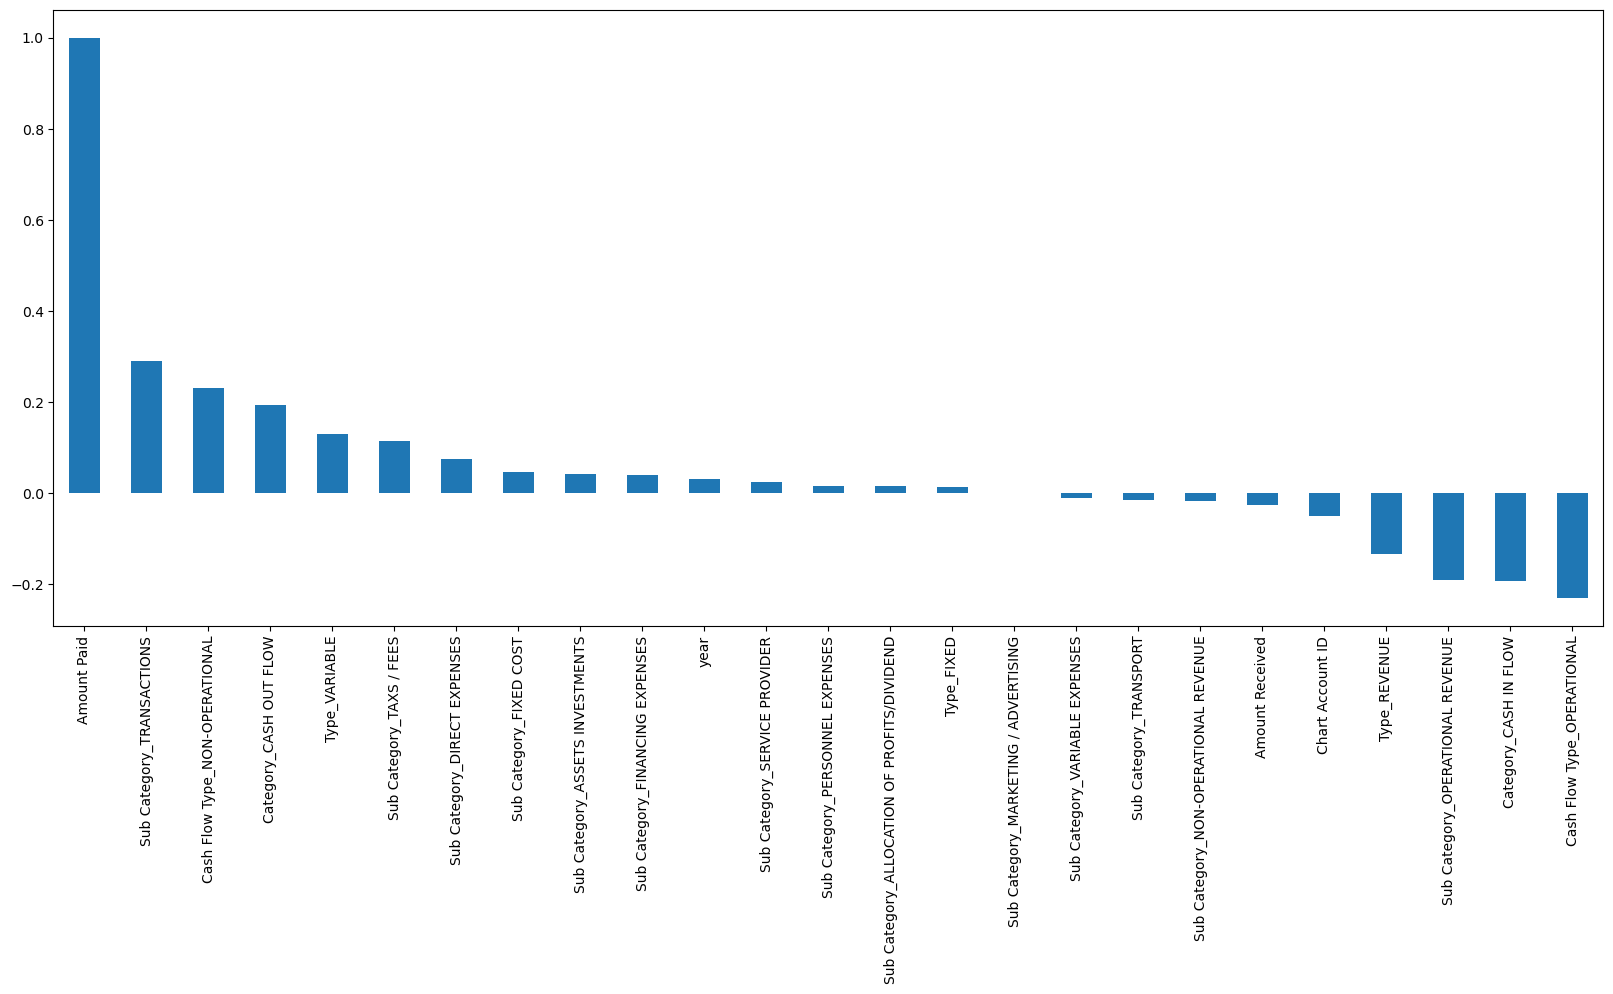

In [242]:

plt.figure(figsize=(20,8))
new_df_dummies.corr()['Amount Paid'].sort_values(ascending = False).plot(kind='bar')

C:\Users\Admin\AppData\Local\Temp\ipykernel_336\819108825.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df_dummies.corr()['Amount Received'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

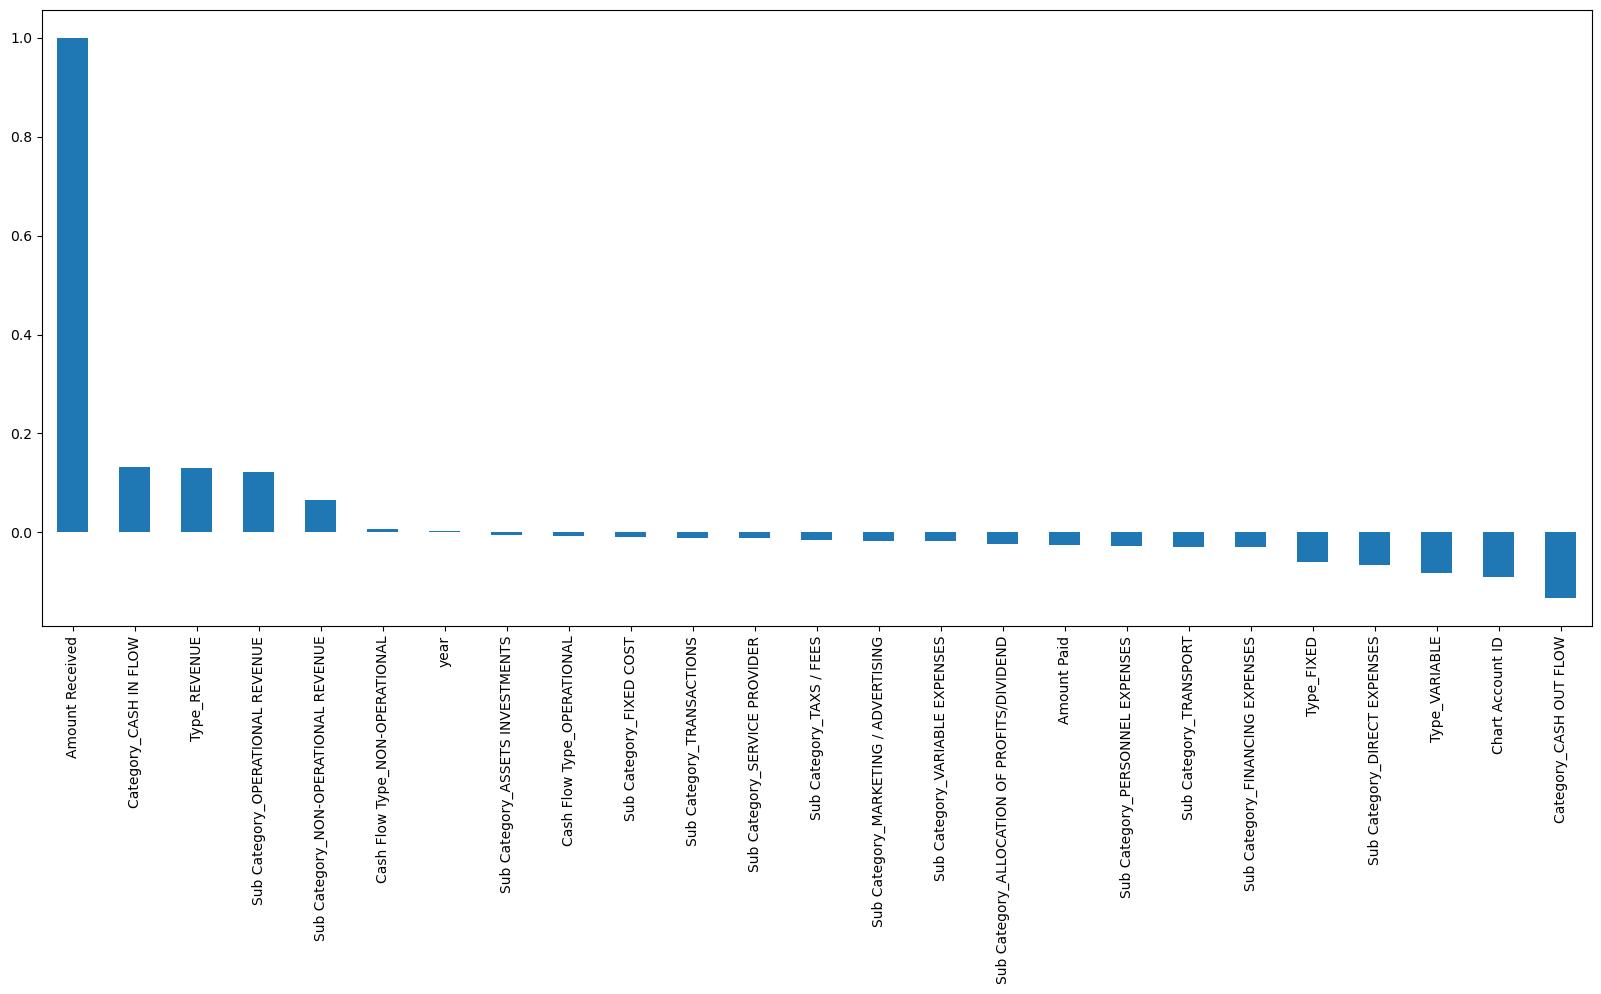

In [243]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Amount Received'].sort_values(ascending = False).plot(kind='bar')

C:\Users\Admin\AppData\Local\Temp\ipykernel_336\2424257962.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df_dummies.corr(), cmap="Paired")


<Axes: >

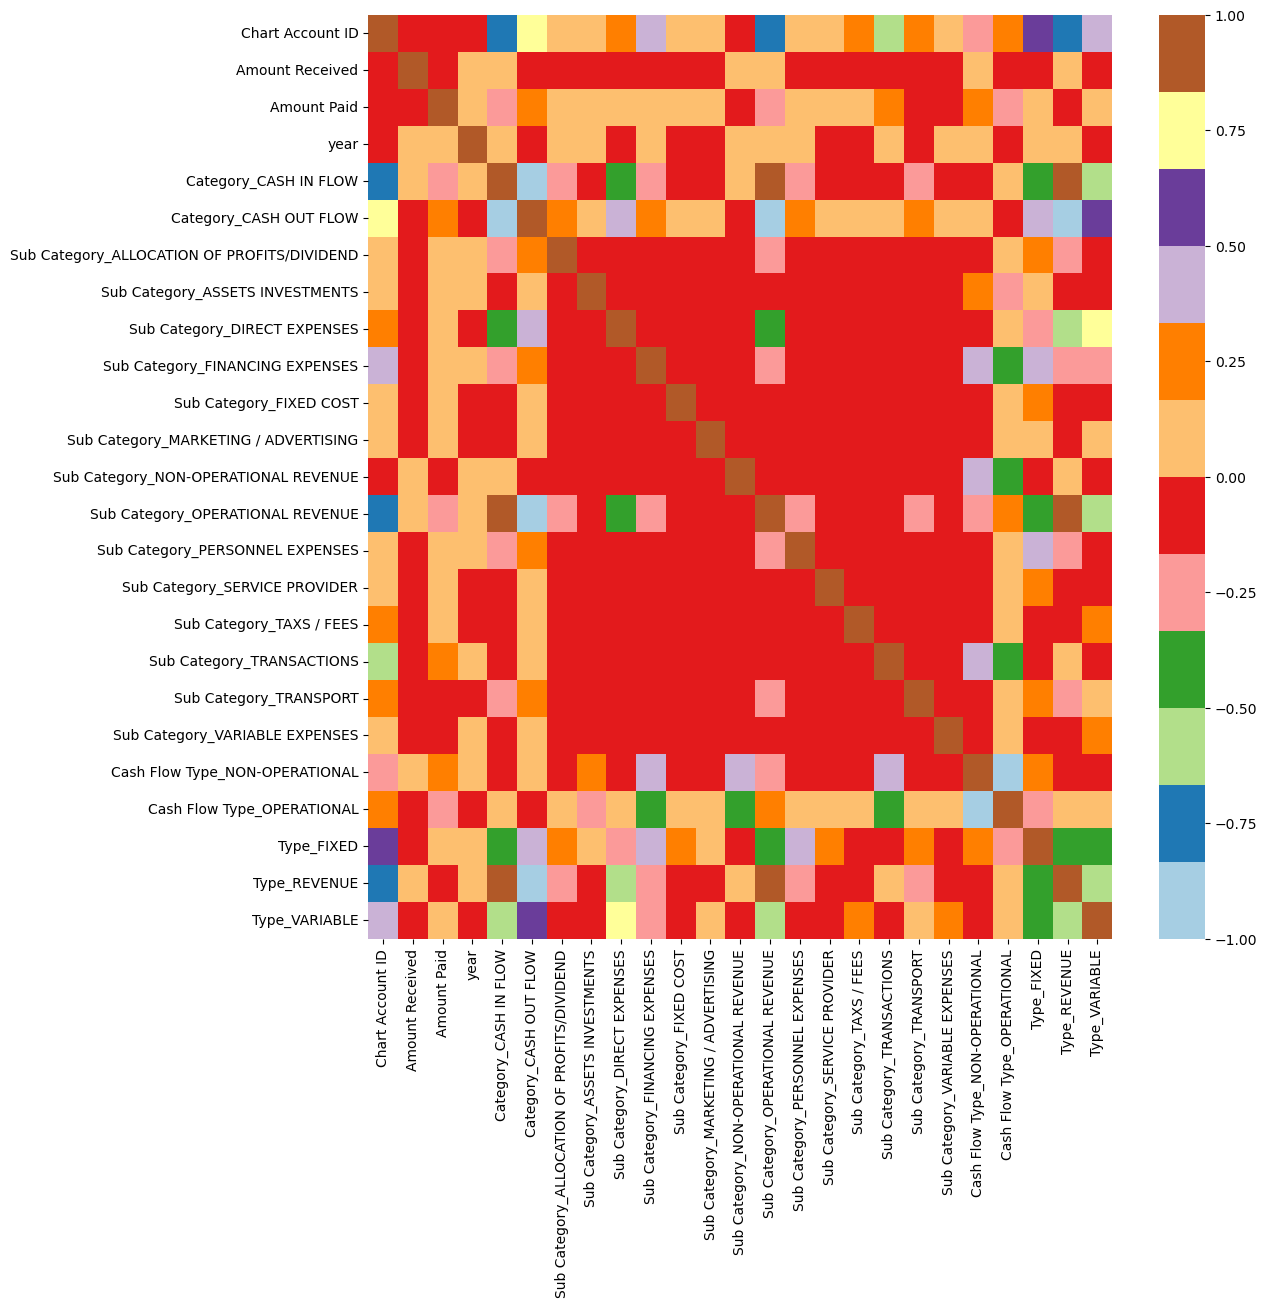

In [246]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")